<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашнее задание по статистическому анализу на python

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [6]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [32]:
df.head(50)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

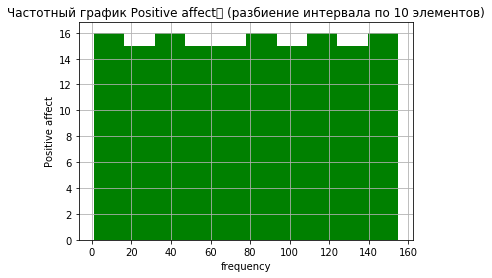

In [11]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect	 (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

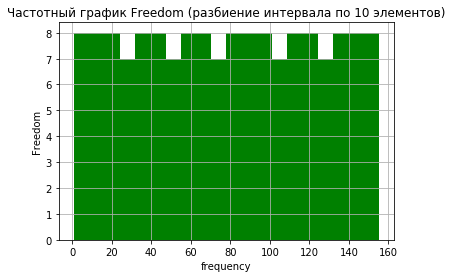

In [21]:
n, bins, patches = plt.hist(df['Freedom'], 20, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Comb Distribution
In a comb distribution, the bars are alternately tall and short. This distribution often results from rounded-off data and/or an incorrectly constructed histogram.
Мы видим из описания, что freedom - это некий коэффициент, степень свободы, что дает в итоге такой эффект распределения.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [38]:
freedom = df['Freedom']#стандартное отконение
np.nanstd(freedom)


44.74371464239419

In [37]:
np.nanvar(freedom)#дисперсия

2002.0

In [39]:
razmah = max(freedom) - min(freedom)#размах, максимум и минимум
razmah

154.0

In [24]:
df['Freedom'].median()


78.0

In [25]:
df['Freedom'].mean()


78.0

In [27]:
df['Freedom'].mode(dropna=False)

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
151    152.0
152    153.0
153    154.0
154    155.0
155      NaN
Length: 156, dtype: float64

In [29]:
df['Freedom'].mode().iat[0]


1.0

Почему нельзя найти моду? 

Ответ* Все оценки встречаются 1 раз, являясь коэфф. или степенью.

In [31]:
df['Freedom'].value_counts()

154.0    1
42.0     1
40.0     1
49.0     1
45.0     1
        ..
119.0    1
92.0     1
103.0    1
88.0     1
5.0      1
Name: Freedom, Length: 155, dtype: int64

In [40]:
freedom.isnull().sum() #выбросы или нулевые значения

1

In [41]:
df = df.dropna(how='any',axis=0)  #удалить данные значения

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

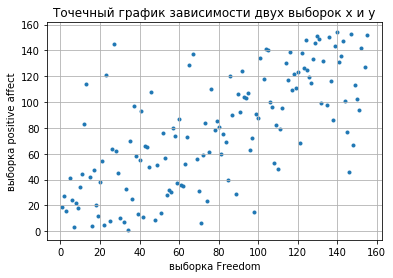

In [43]:
freedom = df['Freedom']
affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, affect, marker='.')

Коэффициент корреляции Пирсона: 0.6965670458090685


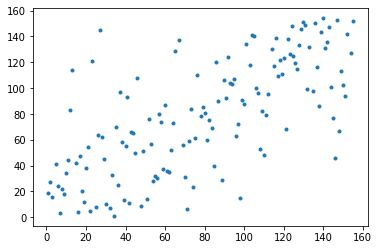

In [44]:
from scipy.stats import pearsonr
x = freedom
y = affect

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коеффициент говорит о том, что существует прямая зависимость между переменными, хотя корреляция небольшая.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [45]:
freedom = df['Freedom']
print(statistics.mean(freedom))

78.82857142857142


In [47]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

6.496390726949487e-15


In [48]:
min(freedom_1)

-77.82857142857142

In [49]:
max(freedom_1)

76.17142857142858

In [50]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

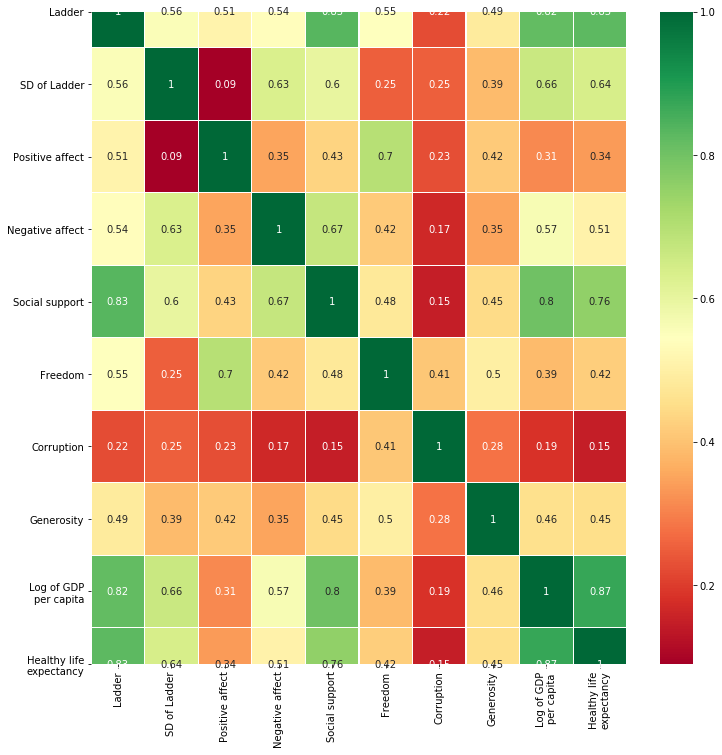

In [51]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [53]:
df=pd.read_csv('data/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

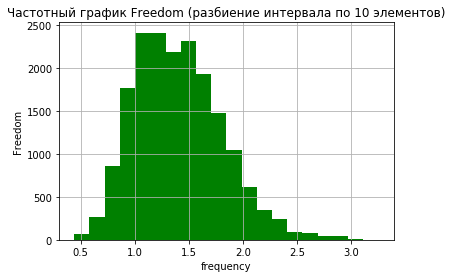

In [54]:
n, bins, patches = plt.hist(df['AveragePrice'], 20, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

In [ ]:
Нормальное распределение.

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [56]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['AveragePrice', '4046', '4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head(10)

,0,1,2,3
0,0.316726,0.000046,0.002660,0.000019
1,0.323843,0.000030,0.002181,0.000023
2,0.174377,0.000035,0.005332,0.000051
3,0.227758,0.000050,0.003516,0.000029
4,0.298932,0.000041,0.002142,0.000030
5,0.291815,0.000052,0.002348,0.000017
6,0.195730,0.000060,0.003599,0.000037
7,0.192171,0.000031,0.004974,0.000031
8,0.206406,0.000045,0.004265,0.000034
9,0.224199,0.000037,0.003163,0.000044


In [57]:
df_norm.corr(method ='pearson') 

,0,1,2,3
0,1.000000,-0.208317,-0.172928,-0.179446
1,-0.208317,1.000000,0.926110,0.833389
2,-0.172928,0.926110,1.000000,0.887855
3,-0.179446,0.833389,0.887855,1.000000


В данном случае наблюдается прямая корреляция между колонками 4046 и 4225 и 4046 и 4770. То есть, чем больше покупали авокадо одного артикля, тем больше покупают и другого. 